In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , r2_score

In [140]:
df = pd.read_csv(r"C:\Users\hplap\Downloads\archive (15)\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [141]:
df.shape

(13320, 9)

In [142]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


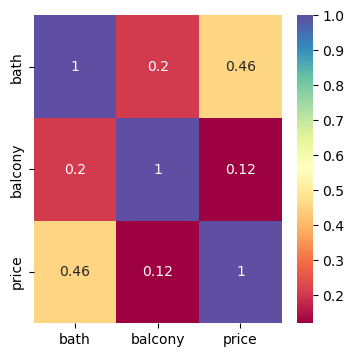

In [144]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True,cmap = 'Spectral')
plt.show()

In [145]:
for column in df.columns:
    print(df[column].value_counts())
    print('*'*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [146]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [203]:
df.describe()

,total_sqft,bath,price,bhk
count,7397.000000,7397.000000,7397.000000,7397.000000
mean,1501.824609,2.450183,99.453952,2.501284
std,933.231712,1.013090,97.565830,0.928431
min,300.000000,1.000000,10.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1259.000000,2.000000,73.000000,2.000000
75%,1680.000000,3.000000,112.000000,3.000000
max,30400.000000,16.000000,2200.000000,16.000000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [149]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [150]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [151]:
df['location'] = df['location'].fillna('Sarjapur  Road')

In [152]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [153]:
df['size'] = df['size'].fillna('2 BHK')

In [154]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [156]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [157]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [158]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [159]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) ==2:
        return(float(temp[0])) + (float(temp[1])) /2
    try:
        return float(x)
    except:
        return None
    

In [160]:
df['total_sqft'] = df['total_sqft'].apply(convertRange)

In [161]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# price per square Feet

In [162]:
df['price_per_sqft'] = df['price'] * 100000/df['total_sqft']

In [163]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [204]:
df.describe()

,total_sqft,bath,price,bhk
count,7397.000000,7397.000000,7397.000000,7397.000000
mean,1501.824609,2.450183,99.453952,2.501284
std,933.231712,1.013090,97.565830,0.928431
min,300.000000,1.000000,10.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1259.000000,2.000000,73.000000,2.000000
75%,1680.000000,3.000000,112.000000,3.000000
max,30400.000000,16.000000,2200.000000,16.000000


In [165]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [166]:
df['location'] = df['location'].apply(lambda x: x.strip())
location = df['location'].value_counts()

In [167]:
location

Whitefield                        541
Sarjapur  Road                    400
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [205]:
location_count = location[location<11]

In [206]:
location_count

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [170]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count else x)

In [171]:
df['location'].value_counts()

other                  2755
Whitefield              541
Sarjapur  Road          400
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: location, Length: 255, dtype: int64

In [172]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1572.225941,2.688814,112.565627,2.802778,7.883254e+03
std,1254.823072,1.338754,148.971674,1.294496,1.064303e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.227642e+03
50%,1280.000000,2.000000,72.000000,3.000000,5.416667e+03
75%,1690.000000,3.000000,120.000000,3.000000,7.293505e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [173]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       579.732987
std        392.247238
min          0.250000
25%        475.000000
50%        554.000000
75%        627.500000
max      26136.000000
dtype: float64

In [174]:
df = df [((df['total_sqft']/df['bhk']) >=300)]

In [175]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1607.911902,2.559537,111.382401,2.650838,6278.292738
std,1277.977557,1.077938,152.077329,0.976678,4171.053803
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1120.000000,2.000000,49.000000,2.000000,4177.777778
50%,1302.500000,2.000000,70.000000,3.000000,5273.281068
75%,1710.000000,3.000000,115.000000,3.000000,6896.551724
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [176]:
df.shape

(12530, 7)

In [177]:
df.price_per_sqft.describe()

count     12530.000000
mean       6278.292738
std        4171.053803
min         267.829813
25%        4177.777778
50%        5273.281068
75%        6896.551724
max      176470.588235
Name: price_per_sqft, dtype: float64

In [178]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        
        st = np.std(subdf.price_per_sqft)
        gen_df  = subdf[(subdf.price_per_sqft >(m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index= True)
    return df_output

df = remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10267.000000,10267.000000,10267.000000,10267.000000,10267.000000
mean,1519.392433,2.473848,91.727590,2.577189,5651.323600
std,906.125988,0.982396,88.510456,0.898273,2297.246271
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4210.526316
50%,1290.000000,2.000000,67.000000,2.000000,5163.043478
75%,1650.500000,3.000000,100.000000,3.000000,6421.317404
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [179]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std (bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
                }
        for bhk , bhk_df  in location_df.groupby('bhk'):
            
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

In [180]:
df = bhk_outlier_remover(df)

In [181]:
df.shape

(7397, 7)

In [182]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10258,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10259,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10262,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10263,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [183]:
df.drop(columns=['size','price_per_sqft'],inplace=True)

In [184]:
df

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10258,other,1200.0,2.0,70.0,2
10259,other,1800.0,1.0,200.0,1
10262,other,1353.0,2.0,110.0,2
10263,other,812.0,1.0,26.0,1


In [185]:
df.to_csv("Cleaned_data.csv")

In [186]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [187]:
x = df.drop(columns=['price'])
y = df['price']

In [188]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [189]:
print(x_train.shape)
print(x_test.shape)

(5917, 4)
(1480, 4)


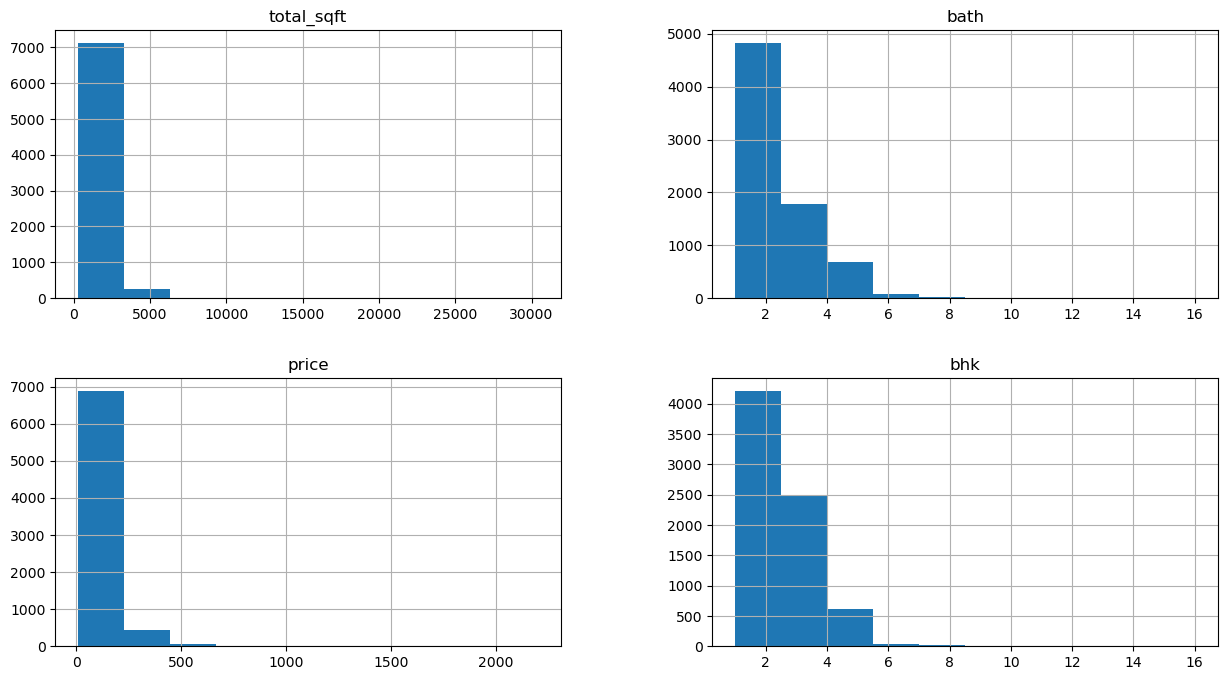

In [190]:
df.hist(figsize=(15,8))
plt.show()

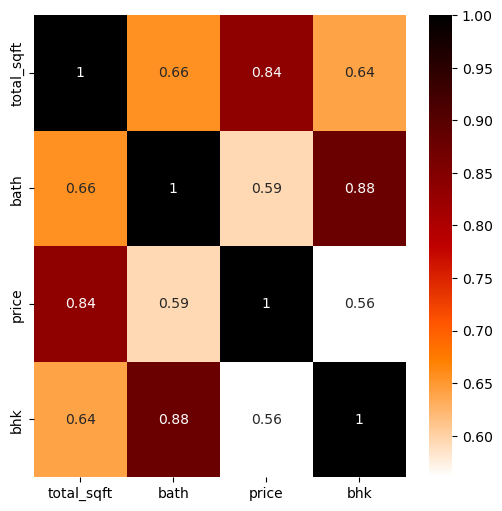

In [191]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap = 'gist_heat_r')
plt.show()

array([[<AxesSubplot:title={'center':'total_sqft'}>,
        <AxesSubplot:title={'center':'bath'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bhk'}>]], dtype=object)

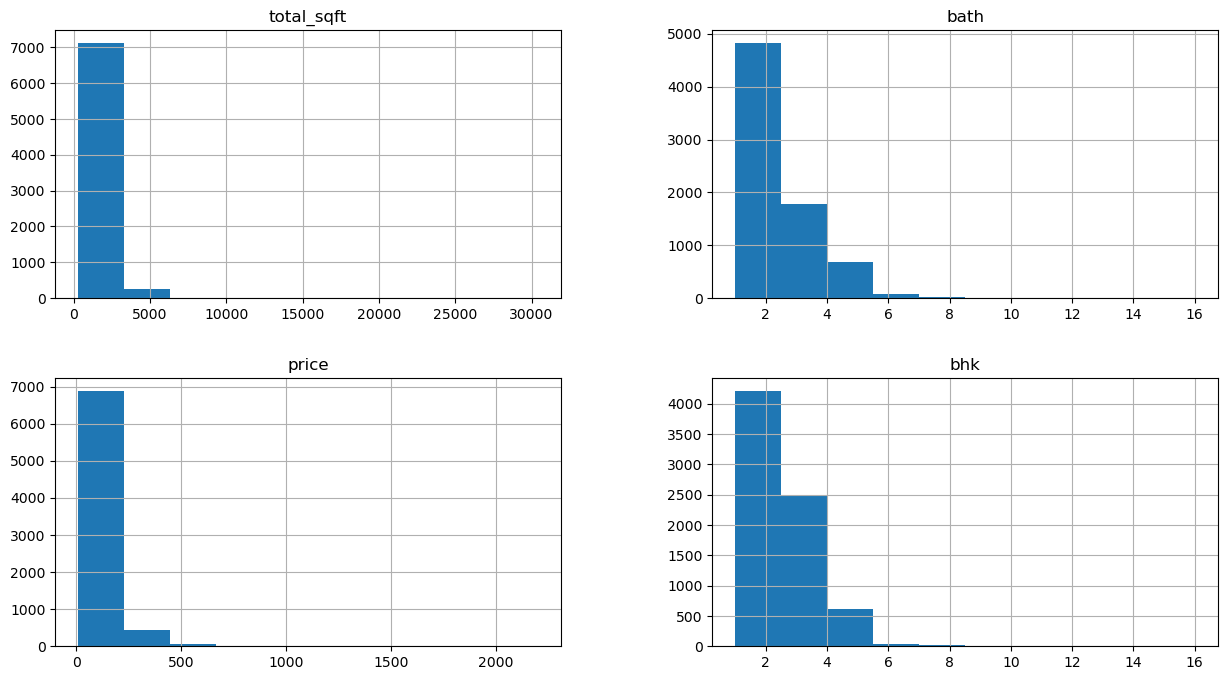

In [192]:
df.hist(figsize=(15,8))

In [193]:
# Applying linear regression
columns = make_column_transformer((OneHotEncoder(sparse=False),['location']),
                                 remainder='passthrough')

In [194]:
st = StandardScaler()

In [195]:
st

StandardScaler()

In [196]:
lr = LinearRegression(normalize=True)

In [197]:
lr

LinearRegression(normalize=True)

In [198]:
make = make_pipeline(columns , st,lr)

In [199]:
make.fit(x_train,y_train)

C:\Users\hplap\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [200]:
y_pred = make.predict(x_test)

In [201]:
y_pred1 = r2_score(y_test,y_pred)

In [202]:
y_pred1

0.8466478435952698

In [114]:
import pickle

In [115]:
pickle.dump(make,open('House.pkl','wb'))